https://slundberg.github.io/shap/notebooks/deep_explainer/Keras%20LSTM%20for%20IMDB%20Sentiment%20Classification.html

In [3]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
max_features = 15000
max_len = 130
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 130), (25000, 130))

In [5]:
model_layers = [
    Embedding(max_features,32,input_length =len(x_train[0])),
    SimpleRNN(16,input_shape = (max_features,max_len), return_sequences=False,activation="relu"),
    Dense(1, activation='sigmoid'),
]
model = Sequential(model_layers)
metrics = ["accuracy"]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
model.summary()

2022-11-24 09:04:18.603783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-24 09:04:18.603817: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-24 09:04:18.603843: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-11-24 09:04:18.604182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 27s 31ms/step - loss: 0.5140 - accuracy: 0.7312 - val_loss: 0.3483 - val_accuracy: 0.8472
Epoch 2/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2771 - accuracy: 0.8870 - val_loss: 0.3432 - val_accuracy: 0.8575
Epoch 3/5
782/782 [==============================] - 15s 19ms/step - loss: 0.1926 - accuracy: 0.9246 - val_loss: 0.3911 - val_accuracy: 0.8484
Epoch 4/5
782/782 [==============================] - 16s 20ms/step - loss: 0.1431 - accuracy: 0.9454 - val_loss: 0.3996 - val_accuracy: 0.8452
Epoch 5/5
782/782 [==============================] - 16s 20ms/step - loss: 0.1091 - accuracy: 0.9601 - val_loss: 0.5563 - val_accuracy: 0.8410


In [7]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.513982,0.73120,0.348321,0.84720
1,0.277052,0.88696,0.343164,0.85748
2,0.192564,0.92456,0.391132,0.84840
3,0.143079,0.94544,0.399587,0.84524
4,0.109090,0.96012,0.556290,0.84104


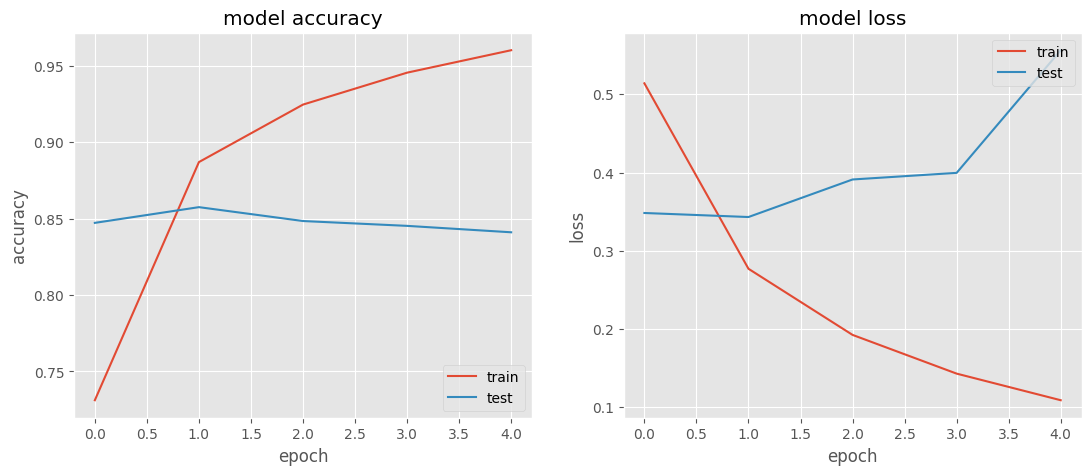

In [9]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

plt.sca(axis[0])
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

plt.sca(axis[1])
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right');